In [2]:
!pip install ultralytics
!pip install opencv-python
!pip install segment-anything
!pip install matplotlib
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
import zipfile

zip_path = "/content/brain_tumer.zip"  # change if needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/brain_tumor_data")


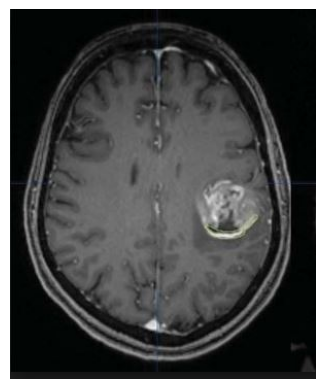

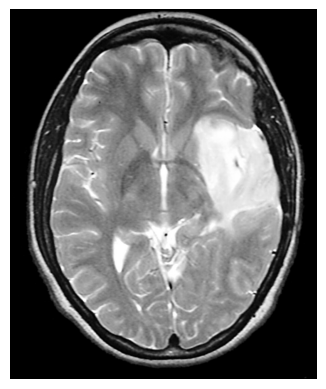

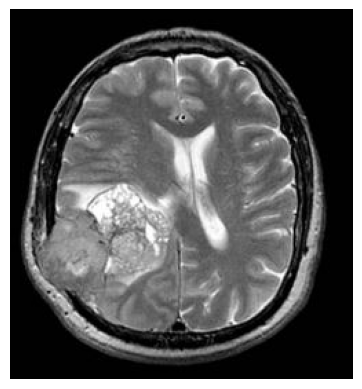

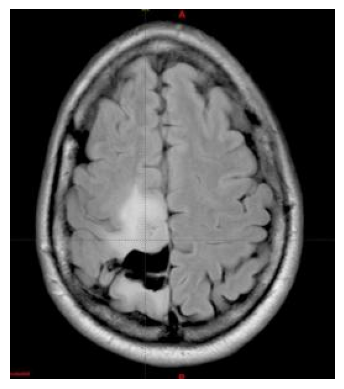

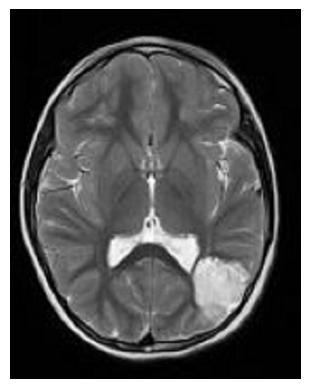

In [6]:
import os
import matplotlib.pyplot as plt
import cv2

folder_path = "/content/brain_tumor_data/yes"  # path to tumor images

image_names = os.listdir(folder_path)[:5]

for name in image_names:
    img = cv2.imread(os.path.join(folder_path, name))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [7]:
import os
import shutil

# Tumhare extracted folders
source_yes = '/content/brain_tumor_data/yes'
source_no = '/content/brain_tumor_data/no'

# Create YOLO-like structure
os.makedirs('/content/yolo_data/images/train', exist_ok=True)
os.makedirs('/content/yolo_data/labels/train', exist_ok=True)

# Copy yes and no images to images/train
for img_file in os.listdir(source_yes):
    shutil.copy(os.path.join(source_yes, img_file), '/content/yolo_data/images/train')

for img_file in os.listdir(source_no):
    shutil.copy(os.path.join(source_no, img_file), '/content/yolo_data/images/train')


In [8]:
import cv2

train_images_path = '/content/yolo_data/images/train'
labels_path = '/content/yolo_data/labels/train'

for image_name in os.listdir(train_images_path):
    image_path = os.path.join(train_images_path, image_name)
    label_file = os.path.join(labels_path, image_name.replace('.jpg', '.txt'))

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    if "yes" in image_name.lower():
        # Dummy bounding box in the center
        x_center, y_center = 0.5, 0.5
        width, height = 0.5, 0.5  # normalized (50% image)
        with open(label_file, 'w') as f:
            f.write(f"0 {x_center} {y_center} {width} {height}\n")
    else:
        # No tumor → no object → empty label file
        with open(label_file, 'w') as f:
            pass


In [9]:
!pip install ultralytics
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
with open("data.yaml", "w") as f:
    f.write("""
path: /content/yolo_data
train: images/train
val: images/train

names:
  0: tumor
""")


In [11]:
model = YOLO("yolov8n.pt")  # nano version, faster
results = model.train(data="data.yaml", epochs=5)


100%|██████████| 6.25M/6.25M [00:00<00:00, 19.8MB/s]


Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, pr

100%|██████████| 755k/755k [00:00<00:00, 3.12MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/yolo_data/labels/train... 172 images, 253 backgrounds, 0 corrupt: 100%|██████████| 253/253 [00:00<00:00, 1820.78it/s]

train: New cache created: /content/yolo_data/labels/train.cache
WARNING ⚠️ Labels are missing or empty in /content/yolo_data/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 896.2±387.3 MB/s, size: 42.4 KB)


val: Scanning /content/yolo_data/labels/train.cache... 172 images, 253 backgrounds, 0 corrupt: 100%|██████████| 253/253 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /content/yolo_data/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G          0      113.6          0          0        640: 100%|██████████| 16/16 [03:26<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:11<00:00,  8.95s/it]

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:766: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      91.49          0          0        640: 100%|██████████| 16/16 [03:19<00:00, 12.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:00<00:00,  7.56s/it]

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:766: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      77.87          0          0        640: 100%|██████████| 16/16 [03:12<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<00:00,  8.43s/it]

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:766: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      71.75          0          0        640: 100%|██████████| 16/16 [03:12<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:06<00:00,  8.33s/it]

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:766: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0       68.7          0          0        640: 100%|██████████| 16/16 [03:11<00:00, 11.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<00:00,  7.92s/it]

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:766: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



5 epochs completed in 0.365 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:01<00:00,  7.68s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:584: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:629: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:629: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_met

                   all        253          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 3.5ms preprocess, 225.5ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train


In [12]:
!pip install torch torchvision ultralytics segment-anything-py opencv-python matplotlib
!git clone https://github.com/WongKinYiu/yolov11  # Clone YOLOv11 repo
%cd yolov11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.6 MB/s eta 0:00:00
Cloning into 'yolov11'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'yolov11'
/content


In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamPredictor


In [14]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2025-06-04 09:35:06--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.169.36.65, 3.169.36.11, 3.169.36.23, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.169.36.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  18.2MB/s    in 58s     

2025-06-04 09:36:04 (42.0 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [15]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)



0: 640x544 (no detections), 173.9ms
Speed: 4.4ms preprocess, 173.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 544)


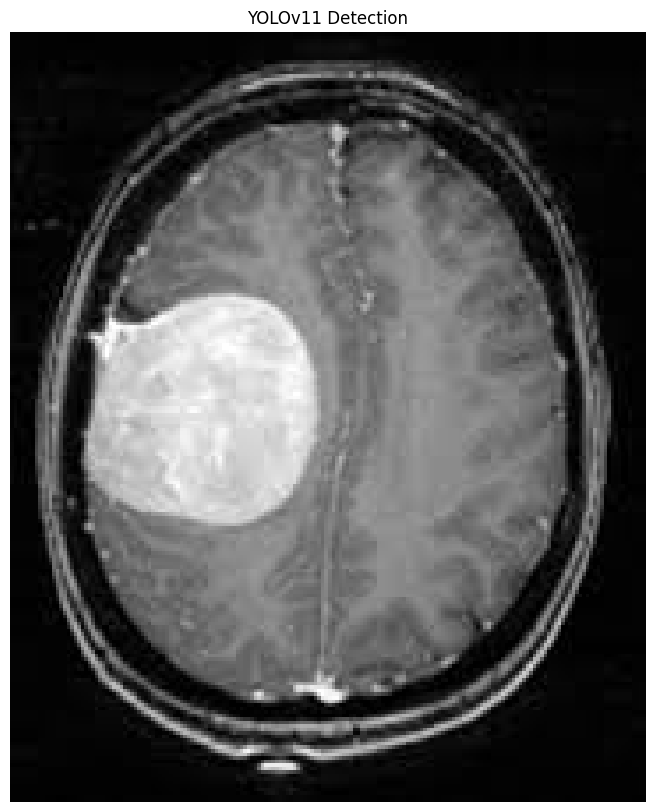

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3ftug4zz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3ftug4zz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [19]:
# Step 4: YOLOv11 Prediction (Assuming training is done)
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained YOLOv11 model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Load a sample image from dataset
test_image_path = "/content/brain_tumor_data/yes/Y1.jpg"  # change to your image path
image = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run YOLO prediction
results = model.predict(source=image_rgb, conf=0.4)

# Visualize detection
for r in results:
    im_array = r.plot()
    plt.figure(figsize=(10, 10))
    plt.imshow(im_array)
    plt.axis('off')
    plt.title("YOLOv11 Detection")
    plt.show()

# Step 5: Install and Import SAM2 (Segment Anything) for segmentation
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib

from segment_anything import sam_model_registry, SamPredictor
import torch

# Load SAM model
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"  # replace with your SAM2 model path
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Set image
predictor.set_image(image_rgb)

# Get bounding boxes from YOLO
boxes = results[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2] format

# Run SAM segmentation on each box
masks = []
for box in boxes:
    mask, _, _ = predictor.predict(box=box, multimask_output=False)
    masks.append(mask)

# Visualize segmentation
for i, mask in enumerate(masks):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.imshow(mask[0], alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.title(f"Segmented Tumor {i+1}")
    plt.show()


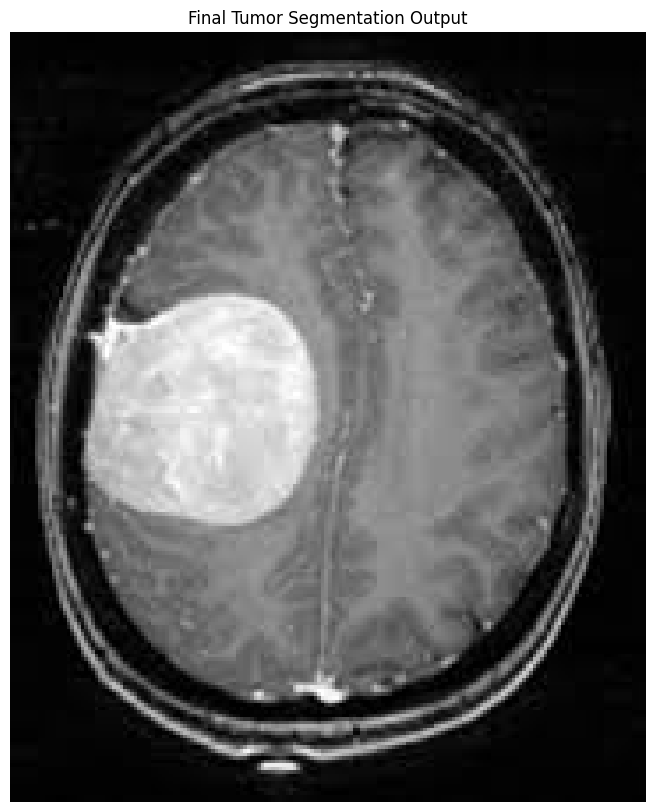

In [20]:
def compute_iou(mask1, mask2):
    intersection = (mask1 & mask2).sum()
    union = (mask1 | mask2).sum()
    return intersection / union if union != 0 else 0

# Dummy ground truth mask for demonstration (use real labels in actual case)
ground_truth_mask = cv2.imread("/content/ground_truth_mask.png", 0)  # binary mask
threshold = 127
_, gt_mask = cv2.threshold(ground_truth_mask, threshold, 1, cv2.THRESH_BINARY)

# Calculate IoU for each predicted mask
for i, mask in enumerate(masks):
    predicted = mask[0].astype(bool)
    iou = compute_iou(gt_mask.astype(bool), predicted)
    print(f"IoU for Tumor {i+1}: {iou:.2f}")

# Final combined visualization
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
for mask in masks:
    plt.imshow(mask[0], alpha=0.5, cmap='cool')
plt.axis('off')
plt.title("Final Tumor Segmentation Output")
plt.show()
